# Audio Signal Classification Project

EE 413 DSP Project using the Free-Spoken Digit Dataset (FSDD)

## Project Overview

Provide a brief summary of the project goals, objectives, and expected outcomes.

## Objectives

- Apply DSP techniques for audio signal classification.
- Extract and analyze time-domain, frequency-domain, and wavelet features.
- Build and evaluate a classifier for the spoken digits.

## Dataset and Tools

Describe the Free-Spoken Digit Dataset (FSDD) and list the tools and libraries that will be used.

In [2]:
#Import libraries here
import os
import numpy as np
import matplotlib.pyplot as plt
import pywt
import ipywidgets as widgets
from matplotlib.colors import LogNorm, Normalize
from IPython.display import display
from scipy import signal, interpolate
import matplotlib.ticker as ticker
import matplotlib.patches as patches
import hub
import librosa
import librosa.display
import av
from scipy import interpolate
from scipy.io import wavfile as wav

c:\Users\MYMut\anaconda3\envs\Audio_Classification\lib\site-packages\deeplake\util\check_latest_version.py:32: UserWarning: A newer version of deeplake (4.1.19) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(


## Data Loading and Exploratory Data Analysis (EDA)

Outline steps for loading the dataset and performing initial exploratory analysis. Include placeholders for findings and visualizations.

In [3]:
#I need to load the data to preform wavelet transform (Saud will probably implement it too)

##Scipy.io wavfile documentation
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html

#Loading the first sample to test wavfile.read
samplerate, data = wav.read('recordings/0_jackson_0.wav')

In [4]:
print(samplerate)
print(data) #
duration = data.shape[0]/samplerate
print(f'duration of first WAV file is {duration}s')

8000
[-369 -431 -475 ...  301  324  304]
duration of first WAV file is 0.6435s


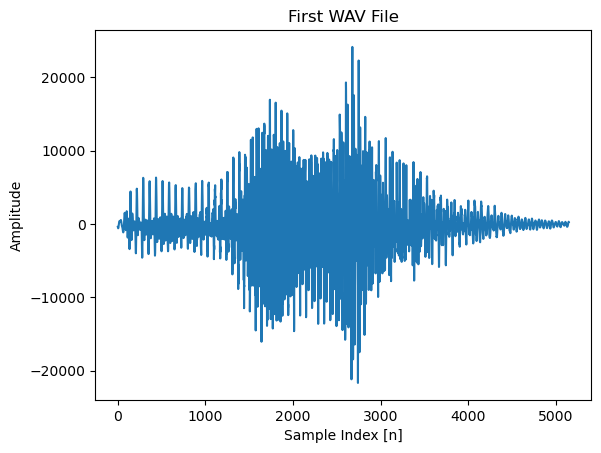

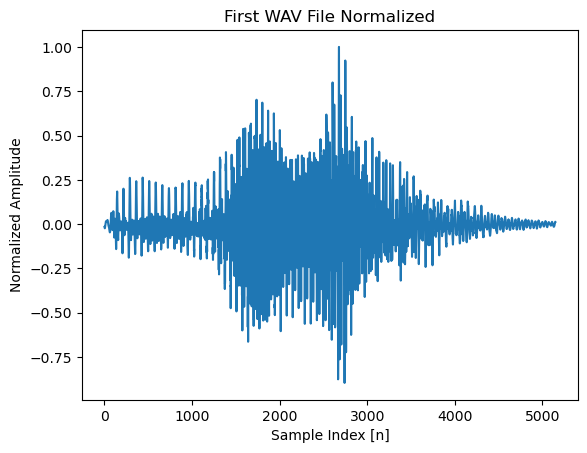

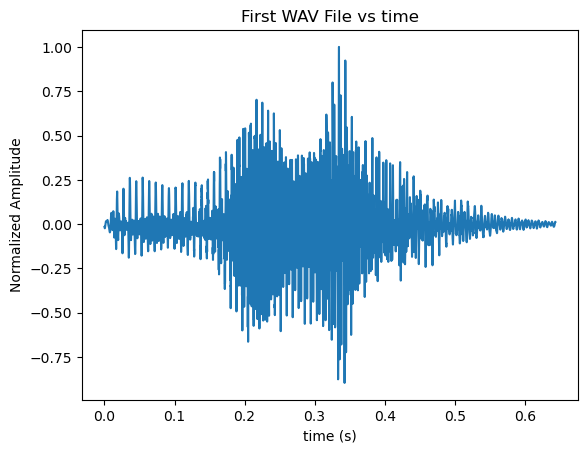

In [5]:
plt.figure()
plt.plot(data)
plt.title('First WAV File')
plt.xlabel("Sample Index [n]")
plt.ylabel("Amplitude")
plt.show()

Maximum = max(data)
plt.figure()
plt.plot(data/Maximum)
plt.title('First WAV File Normalized')
plt.xlabel("Sample Index [n]")
plt.ylabel("Normalized Amplitude")
plt.show()


time = np.linspace(0,duration,data.shape[0])
plt.figure()
plt.plot(time, data/Maximum)
plt.title('First WAV File vs time')
plt.xlabel("time (s)")
plt.ylabel("Normalized Amplitude")
plt.show()

Text(0.5, 1.0, '0_jackson_0.wav')

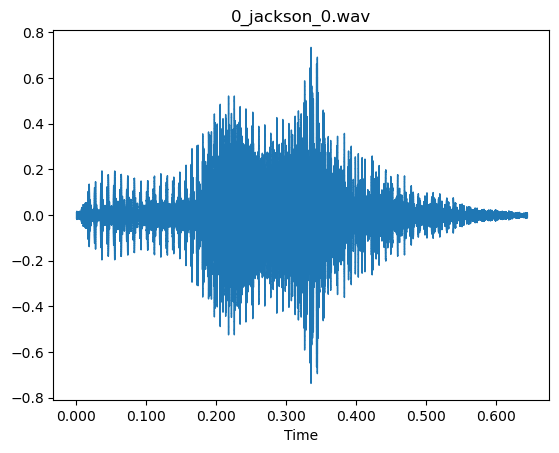

In [6]:
#Instead of doing all this we can use librosa library
time_series, sample_rate = librosa.load('recordings/0_jackson_0.wav', duration=10)
plt.figure()
librosa.display.waveshow(time_series, sr=sample_rate)
plt.title('0_jackson_0.wav')

In [7]:
##Saud

## Time-Domain Analysis

Detail the plan for extracting time-domain features (e.g., zero-crossing rate, RMS energy, etc.).

In [8]:
##Saud

## Frequency-Domain Analysis

Describe the approach for performing frequency analysis (using STFT, spectral features, MFCCs, etc.).

## Wavelet Transform Analysis

Outline the method for applying wavelet transform techniques and extracting features.

In [31]:
#pywt.wavelist(kind='discrete')

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5
 21.  21.5 22.  22.5 23.  23.5 24.  24.5 25.  25.5 26.  26.5 27.  27.5
 28.  28.5 29.  29.5 30.  30.5 31.  31.5 32.  32.5 33.  33.5 34.  34.5
 35.  35.5 36.  36.5 37.  37.5 38.  38.5 39.  39.5 40.  40.5 41.  41.5
 42.  42.5 43.  43.5 44.  44.5 45.  45.5 46.  46.5 47.  47.5 48.  48.5
 49.  49.5 50.  50.5 51.  51.5 52.  52.5 53.  53.5 54.  54.5 55.  55.5
 56.  56.5 57.  57.5 58.  58.5 59.  59.5 60.  60.5 61. ]


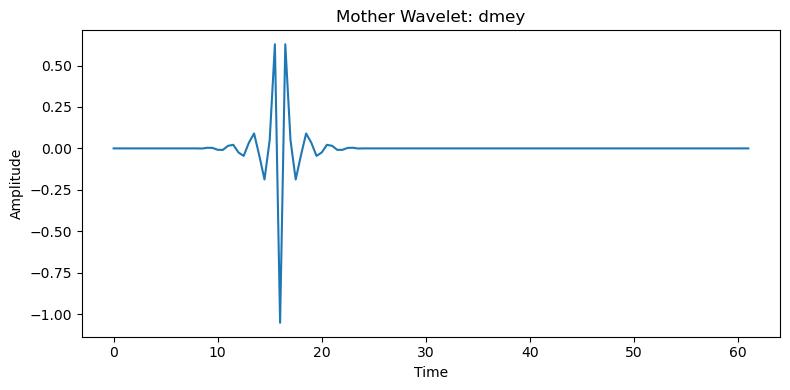

[ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.    3.25  3.5   3.75  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75
  6.    6.25  6.5   6.75  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75
  9.    9.25  9.5   9.75 10.   10.25 10.5  10.75 11.   11.25 11.5  11.75
 12.   12.25 12.5  12.75 13.   13.25 13.5  13.75 14.   14.25 14.5  14.75
 15.   15.25 15.5  15.75 16.   16.25 16.5  16.75 17.   17.25 17.5  17.75
 18.   18.25 18.5  18.75 19.   19.25 19.5  19.75 20.   20.25 20.5  20.75
 21.   21.25 21.5  21.75 22.   22.25 22.5  22.75 23.   23.25 23.5  23.75
 24.   24.25 24.5  24.75 25.   25.25 25.5  25.75 26.   26.25 26.5  26.75
 27.   27.25 27.5  27.75 28.   28.25 28.5  28.75 29.   29.25 29.5  29.75
 30.   30.25 30.5  30.75 31.   31.25 31.5  31.75 32.   32.25 32.5  32.75
 33.   33.25 33.5  33.75 34.   34.25 34.5  34.75 35.   35.25 35.5  35.75
 36.   36.25 36.5  36.75 37.   37.25 37.5  37.75 38.   38.25 38.5  38.75
 39.   39.25 39.5  39.75 40.   40.25 40.5  40.75 41

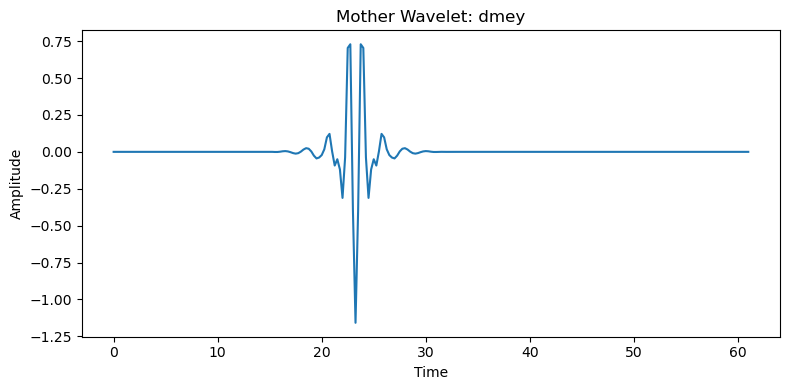

[0.00000000e+00 1.95312500e-03 3.90625000e-03 ... 6.09960938e+01
 6.09980469e+01 6.10000000e+01]


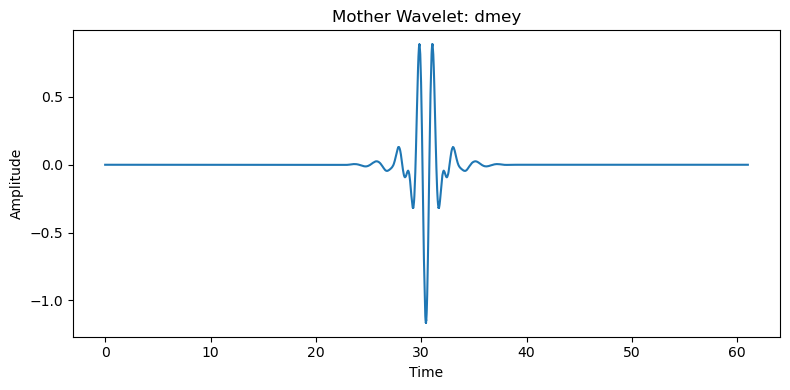

In [ ]:
def plot_mother_wavelet(wavelet_name='db4', level=1):
    """
    Plot the mother wavelet for a given wavelet.

    Parameters:
        wavelet_name (str): Name of the wavelet (e.g., 'db4', 'morl').
        level (int): Resolution parameter for wavefun (higher gives finer resolution default is 5).
    """
    wavelet = pywt.Wavelet(wavelet_name)
    phi, psi, x = wavelet.wavefun(level=level)

    
    plt.figure(figsize=(8, 4))
    plt.plot(x, psi)
    plt.title(f"Mother Wavelet: {wavelet_name}")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.tight_layout()
    plt.show()

# Example usage:
plot_mother_wavelet('dmey', level=1)
plot_mother_wavelet('dmey', level=2)
plot_mother_wavelet('dmey', level=9)


In [10]:
def extract_wavelet_features(audio_data, wavelet, levels=5):
    """
    Compute discrete wavelet features from a raw audio signal.
    
    Parameters:
        audio_data (numpy.ndarray): 1D array of raw audio samples.
        wavelet (str): Wavelet type to use.
        levels (int, optional): Number of decomposition levels (default 5).
    
    Returns:
        tuple that contains:
              - 'coefficients': list of arrays for each decomposition level.
              - 'energies': energy for each level.
    
    Example:
        features = extract_wavelet_features(audio, wavelet='db4', levels=4)
    """
    coeffs = pywt.wavedec(audio_data, wavelet, level=levels)
    
    energies = [np.sum(c ** 2) for c in coeffs] #List comprehension (ISE291)
        
    return (coeffs,energies)


In [34]:
features = extract_wavelet_features(time_series,'haar',6)

In [12]:
def plot_wavelet_scalogram_from_features(features, original_length,title):
    """
    Plot a wavelet scalogram from wavelet features (coefficients) without any axes, colorbar, or padding.
    
    Parameters:
        features (tuple): Must contain wavelet coefficients in features[0].
                                 Assumes they're in the order [Approximation, Detail_n, ..., Detail_1].
        original_length (int):   Number of samples in the original 1-second signal.
        title (string): The name of png file
        
    Returns:
        None. Displays a borderless plot with no axes or legends.
    """
    coeffs = features[0]  
    num_levels = len(coeffs)

    # Prepare a 2D array for the scalogram
    scalogram = np.zeros((num_levels, original_length))

    # We'll treat the signal as lasting from 0 to 1s
    x_target = np.linspace(0, 1, original_length)

    # Interpolate each coefficient array onto the same (0→1) axis
    for i, c in enumerate(coeffs):
        x_row = np.linspace(0, 1, len(c))
        scalogram[i, :] = np.interp(x_target, x_row, np.abs(c))

    #Normalization    
    for i in range(num_levels):
        max_val = np.max(scalogram[i, :])
        if max_val > 0:
            scalogram[i, :] = scalogram[i, :]/max_val

    # Create the figure of scalo
    fig, ax = plt.subplots(figsize=(2.24, 2.24))  
    # Plot the scalogram 
    ax.imshow(scalogram, aspect="auto", cmap="jet", extent=[0, 1, 0, num_levels], origin="lower")

    # Remove all axes
    ax.axis('off')
    fig.subplots_adjust(left=0, right=1, top=1, bottom=0)
    #plt.show()

    fig.savefig(f'{title}.png', bbox_inches='tight', pad_inches=0)
    plt.close(fig)

In [35]:
plot_wavelet_scalogram_from_features(features, len(time_series),'Scalo0_haar')

In [14]:
def dir_to_scalograms(audio_dir, scalogram_dir):
    """
    Creates spectrogram images for all audio files in the specified directory and saves them.

    Parameters:
        audio_dir (str): Path to the directory containing the input audio files.
        spectrogram_dir (str): Path to the directory where the spectrogram images will be saved.

    Returns:
        None

    Example:
        dir_to_spectrogram("audio_recordings/", "output_scalograms/")
    """
    #print([f for f in os.listdir('recordings')])
    #listr = []
    file_names = [f for f in os.listdir(audio_dir)]
    for file in file_names:
        #print('recordings/'+file)
        time_series, sample_rate = librosa.load('recordings/'+file, duration=10)
        features = extract_wavelet_features(time_series,'haar',6)
        image_Name = scalogram_dir + '/' + file.replace('.wav','')+'_Scalogram'
        #print(image_Name)
        plot_wavelet_scalogram_from_features(features,len(time_series),image_Name)

In [15]:
#This should'nt run again because it takes a lot of time
#dir_to_scalograms('recordings', 'Scalograms')

## Classification System

Plan the design and evaluation of the classification system, including feature selection, model choice, and performance metrics.

In [16]:
##Sahal

## Results and Analysis

Document the experimental results, evaluation metrics, and any comparative analysis of the feature extraction methods.

In [17]:
##Sahal

## Conclusion

Summarize the key outcomes of the project and propose future work or improvements.

In [18]:
##All?